<a href="https://colab.research.google.com/github/Leomutz/NIDS1/blob/main/Hyperparameters_tuning_image_classification_handwritten_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, RMSprop
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import LearningRateScheduler, History

# reproducibility
np.random.seed(42)

In [ ]:
fashion_mnist = datasets.mnist

In [ ]:
(train_images,train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


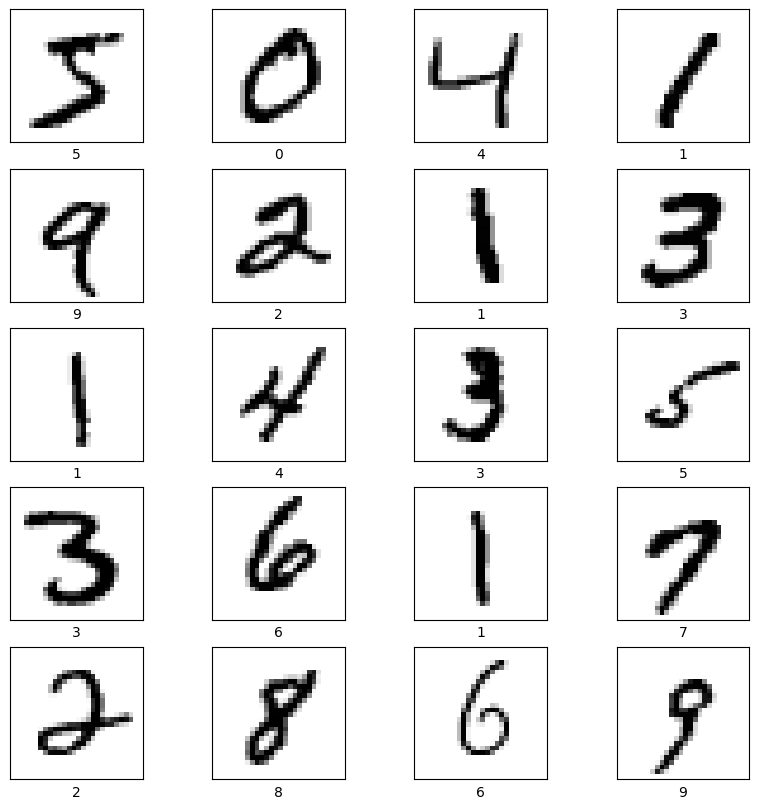

In [ ]:
# view the training samples
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
  #plt.xlabel(class_names[train_labels[train_labels[i]]])
  #class_names[train_labels[train_labels[i]]]

In [ ]:
# check the dimensions of the datasets
print(f'we have {train_images.shape[0]} train samples')
print(f'we have {test_images.shape[0]} test samples')

we have 60000 train samples
we have 10000 test samples


In [ ]:
# preprocessing
# normalize the data
x_train, x_test = train_images/255.0, test_images/255.0

# reshape the data into 1D vectors
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

num_classes = 10

# check the column length
x_train.shape[1]

784

In [ ]:
# one-hot encode
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(train_labels, num_classes)
y_test = keras.utils.to_categorical(test_labels, num_classes)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# parameters

epochs = 10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
# build a neural network architecture
# build the model
input_dim = x_train.shape[1]

lr_model = Sequential()
lr_model.add(Dense(64, activation='relu', kernel_initializer='uniform',
                   input_dim=input_dim))
lr_model.add(Dropout(0.1))
lr_model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
lr_model.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))

# compilt the model
lr_model.compile(loss='categorical_crossentropy', optimizer=sgd,
                 metrics=['acc'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
%%time
# fit the model
batch_size = int(input_dim/100)

lr_model_history = lr_model.fit(x_train, y_train,
                                batch_size=batch_size, epochs=epochs,
                                verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
8572/8572 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - acc: 0.4837 - loss: 1.4826 - val_acc: 0.1997 - val_loss: 1.8752
Epoch 2/10
8572/8572 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - acc: 0.1999 - loss: 1.9397 - val_acc: 0.1974 - val_loss: 1.9485
Epoch 3/10
8572/8572 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - acc: 0.1521 - loss: 2.1227 - val_acc: 0.1009 - val_loss: 2.3322
Epoch 4/10
8572/8572 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - acc: 0.1064 - loss: 2.2981 - val_acc: 0.1029 - val_loss: 2.3170
Epoch 5/10
8572/8572 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - acc: 0.1057 - loss: 2.2988 - val_acc: 0.0980 - val_loss: 2.3127
Epoch 6/10
8572/8572 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - acc: 0.1374 - loss: 2.2119 - val_acc: 0.1753 - val_loss: 1.9686
Epoch 7/10
8572/8572 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - acc: 0.1907 - loss: 1.9448 - val_acc: 0.1763 - val_loss: 1.9085
Epoch 8/10
8572/8572 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - acc: 0.1863 - loss: 1.9340 - val_acc: 0.1835 - val_loss: 2.0543
Epoch 9/10
8572/8572 ━━━━━━━━━━━

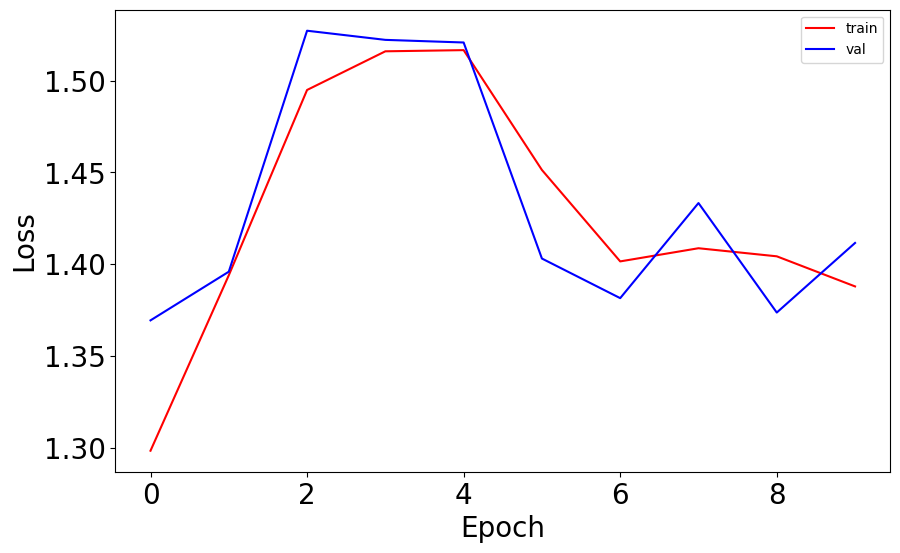

In [ ]:
# loss function plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b', label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

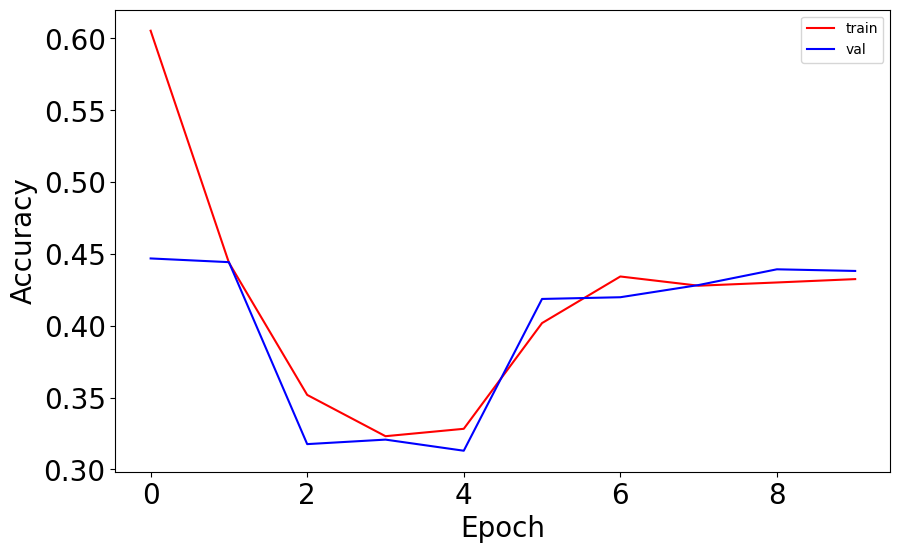

In [ ]:
# accuracy plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(np.sqrt(lr_model_history.history['acc']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_acc']), 'b', label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [ ]:
# implement the previous with custom learning rate

# parameters

epochs = 10
# initial learning rate
learning_rate = 0.1
decay_rate = 0.1
momentum = 0.8

# define the optimizer function
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

input_dim = x_train.shape[1]
num_classess = 10
batch_size = 196

# model implementation
exponential_decay_model = Sequential()
exponential_decay_model.add(Dense(64, activation='relu', kernel_initializer='uniform',
                                  input_dim=input_dim))
exponential_decay_model.add(Dropout(0.1))

exponential_decay_model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
exponential_decay_model.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))

# compile
exponential_decay_model.compile(loss='categorical_crossentropy', optimizer=sgd,
                                metrics=['acc'])

# learning rate function
def exp_decay(epoch):
  lrate = learning_rate * np.exp(-decay_rate*epoch)
  return lrate


# learning schedule callback
loss_history = History()
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lr_rate]

# invoke the LearningRateScheduler during the .fit() phase
exponential_decay_model_history = exponential_decay_model.fit(x_train, y_train,
                                                              batch_size=batch_size,
                                                              epochs=epochs,
                                                              callbacks=callbacks_list,
                                                              verbose=1,
                                                              validation_data=(x_test, y_test))


Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.5570 - loss: 1.3096 - val_acc: 0.9363 - val_loss: 0.2117 - learning_rate: 0.1000
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9338 - loss: 0.2175 - val_acc: 0.9541 - val_loss: 0.1576 - learning_rate: 0.0905
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9532 - loss: 0.1553 - val_acc: 0.9654 - val_loss: 0.1110 - learning_rate: 0.0819
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9616 - loss: 0.1246 - val_acc: 0.9690 - val_loss: 0.0993 - learning_rate: 0.0741
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9681 - loss: 0.1034 - val_acc: 0.9708 - val_loss: 0.0962 - learning_rate: 0.0670
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9708 - loss: 0.0948 - val_acc: 0.9726 - val_loss: 0.0893 - learning_rate: 0.0607
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9746 - loss: 0.0849 - val_acc: 0.9734 - val_loss: 0.0849 - learning_rate: 0.0549
Epoch 

In [ ]:
#exponential_decay_model_history.history
callbacks_list

KeyError: 'lr_rate'

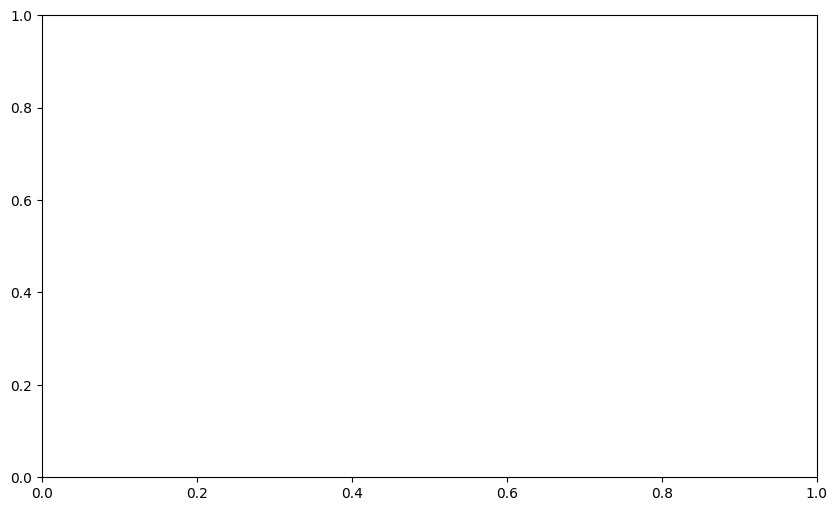

In [ ]:
# plot the learning rate and loss functions

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(exponential_decay_model_history.history['lr_rate'],'r') # label='learn rate'
#ax.plot(callbacks_list[1],'r')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Learning Rate', fontsize=20)
ax.tick_params(labelsize=20)

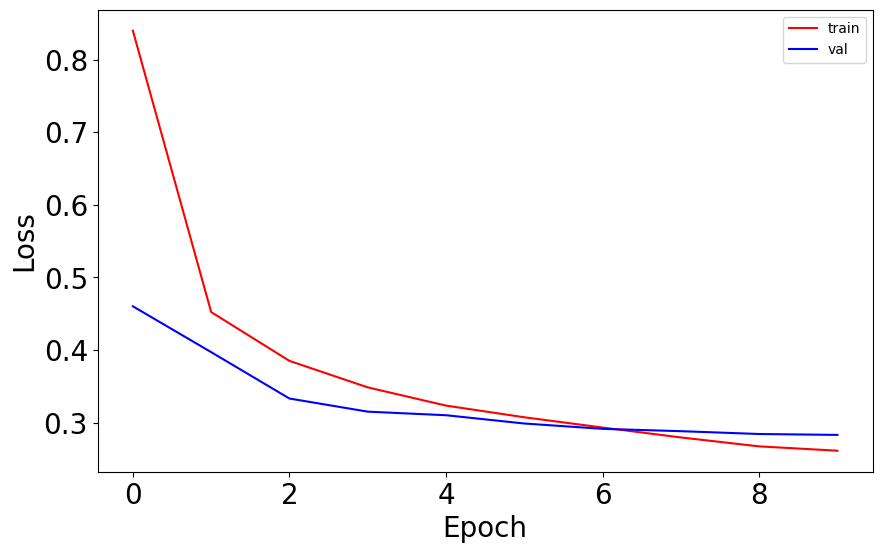

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(exponential_decay_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(exponential_decay_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [ ]:
# find optimal batch size and epochs

%%time
batch_size = input_dim
epochs = 10

model_history = lr_model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.2583 - loss: 2.1438 - val_acc: 0.8384 - val_loss: 0.5286
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.8519 - loss: 0.4961 - val_acc: 0.9092 - val_loss: 0.3155
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9010 - loss: 0.3384 - val_acc: 0.9223 - val_loss: 0.2581
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9220 - loss: 0.2653 - val_acc: 0.9405 - val_loss: 0.1969
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9370 - loss: 0.2142 - val_acc: 0.9501 - val_loss: 0.1634
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9457 - loss: 0.1877 - val_acc: 0.9551 - val_loss: 0.1448
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9514 - loss: 0.1626 - val_acc: 0.9604 - val_loss: 0.1303
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9575 - loss: 0.1414 - val_acc: 0.9645 - val_loss: 0.1204
Epoch 9/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.9602 - loss

Test loss: 0.10638684034347534
Test accuracy: 0.9675999879837036


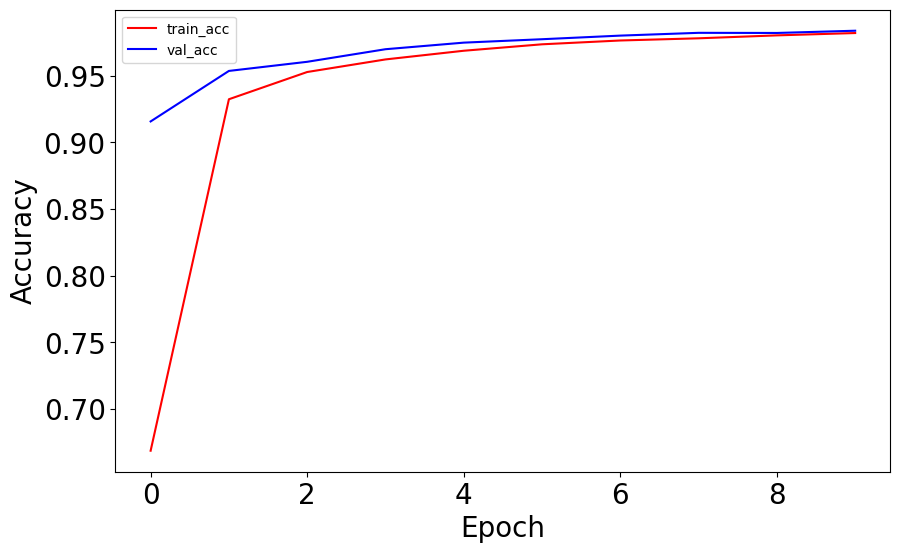

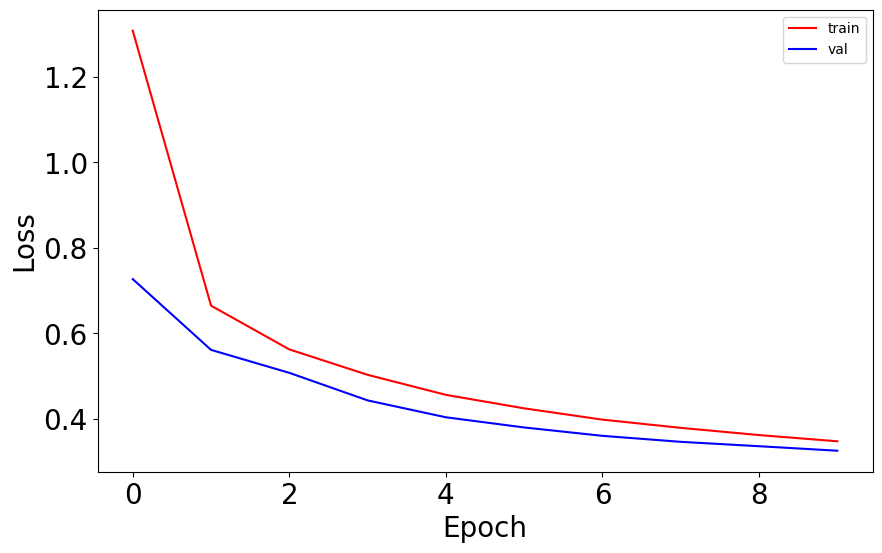

In [ ]:
score = lr_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['acc']), 'r', label='train_acc')
ax.plot(np.sqrt(model_history.history['val_acc']), 'b' ,label='val_acc')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [ ]:
# Tuning Hyperparameters by Cross-validation

In [ ]:
!pip install scikeras


In [ ]:
from sklearn.model_selection import GridSearchCV
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier


In [ ]:
# let's create a function that creates the model (required for KerasClassifier)
# while accepting the hyperparameters we want to tune
# we also pass some default values such as optimizer='rmsprop'
def create_model(init_mode):
    init_mode='uniform'
    # define model
    model = Sequential()
    model.add(Dense(64, kernel_initializer=init_mode, activation='relu', input_dim=784))
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(10, kernel_initializer=init_mode, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model

In [ ]:
%%time
seed = 7
np.random.seed(seed)
batch_size = 128
epochs = 10

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs,
                           batch_size=batch_size, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero',
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

ValueError: Invalid parameter init_mode for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(init_mode=uniform)`
Check the list of available parameters with `estimator.get_params().keys()`

In [ ]:
# print results
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

NameError: name 'grid_result' is not defined

K-fold CV - Hyperparameter tuning